In [100]:
# Read and Visualize your data 
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#for preprocessing 
from sklearn import preprocessing

#supress warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [101]:
# Load and display the data using pandas 
data = pd.read_csv('RightTurns_NoEvents.csv', index_col=0)
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head(10))

,acc_x_max,acc_y_max,acc_z_max,acc_x_min,acc_y_min,acc_z_min,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,...,gyro_x_mean,gyro_y_mean,gyro_z_mean,gyro_x_std,gyro_y_std,gyro_z_std,gyro_x_var,gyro_y_var,gyro_z_var,class
Name,,,,,,,,,,,,,,,,,,,,,
1st,0.104,0.100,-0.991,-0.137,-0.052,-1.075,0.020,0.037,-1.068,0.081,...,-0.363,0.287,-1.239,0.053,0.045,1.025,0.003,0.002,1.051,0
2nd,-0.020,0.057,-1.061,-0.175,-0.103,-1.072,-0.117,-0.029,-1.068,0.049,...,-0.310,0.314,-3.020,0.016,0.010,0.804,0.000,0.000,0.647,0
3rd,0.085,0.082,-1.057,-0.174,-0.042,-1.071,-0.032,0.025,-1.063,0.090,...,-0.336,0.306,-1.737,0.038,0.028,1.053,0.001,0.001,1.109,0
4th,0.037,0.011,-1.058,-0.218,-0.089,-1.069,-0.130,-0.062,-1.064,0.072,...,-0.340,0.295,-2.687,0.042,0.020,0.795,0.002,0.000,0.633,0
5th,0.108,0.062,-1.063,-0.172,-0.047,-1.072,-0.027,0.004,-1.068,0.102,...,-0.398,0.318,-1.741,0.045,0.035,1.221,0.002,0.001,1.492,0
6th,-0.037,0.008,-1.065,-0.230,-0.097,-1.073,-0.170,-0.060,-1.069,0.057,...,-0.338,0.346,-2.972,0.035,0.017,0.557,0.001,0.000,0.310,0
7th,-0.059,0.025,-1.052,-0.241,-0.021,-1.068,-0.180,-0.002,-1.061,0.056,...,-0.383,0.317,-3.247,0.024,0.017,0.599,0.001,0.000,0.359,0
8th,-0.041,-0.026,-1.063,-0.282,-0.102,-1.073,-0.199,-0.082,-1.069,0.071,...,-0.375,0.364,-3.208,0.068,0.032,0.707,0.005,0.001,0.499,0
9th,-0.044,0.062,-1.064,-0.242,-0.014,-1.069,-0.182,0.006,-1.066,0.059,...,-0.332,0.324,-3.033,0.021,0.048,0.702,0.000,0.002,0.493,0


In [102]:
data.shape

(62, 31)

Text(0.5,1,'acc_x_max vs. Class')

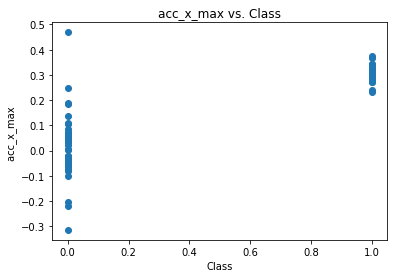

In [103]:
# Visualizing the data reveals infomration that is not very obvious in the tables
plt.plot(data['class'], data['acc_x_max'], 'o' )
plt.xlabel('Class')
plt.ylabel('acc_x_max ')
plt.title('acc_x_max vs. Class')


{'boxes': [<matplotlib.lines.Line2D at 0x1a1cc2ec18>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1cc37780>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1cc414e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1cc41080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a1cc2eda0>,
  <matplotlib.lines.Line2D at 0x1a1cc37320>]}

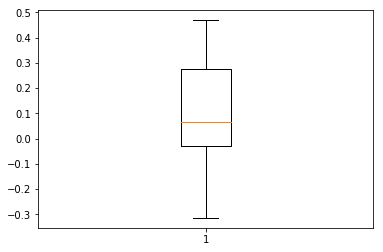

In [104]:
# Find outliers - uses IQR / other methods exist (kernel density estimation)
plt.figure()
plt.boxplot(data['acc_x_max'])


In [105]:
#Devide your data into X and Y
X = data.drop('class', 1)
Y = data['class']

In [106]:
X.head()

,acc_x_max,acc_y_max,acc_z_max,acc_x_min,acc_y_min,acc_z_min,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,...,gyro_z_min,gyro_x_mean,gyro_y_mean,gyro_z_mean,gyro_x_std,gyro_y_std,gyro_z_std,gyro_x_var,gyro_y_var,gyro_z_var
Name,,,,,,,,,,,,,,,,,,,,,
1st,0.104,0.100,-0.991,-0.137,-0.052,-1.075,0.020,0.037,-1.068,0.081,...,-3.303,-0.363,0.287,-1.239,0.053,0.045,1.025,0.003,0.002,1.051
2nd,-0.020,0.057,-1.061,-0.175,-0.103,-1.072,-0.117,-0.029,-1.068,0.049,...,-3.907,-0.310,0.314,-3.020,0.016,0.010,0.804,0.000,0.000,0.647
3rd,0.085,0.082,-1.057,-0.174,-0.042,-1.071,-0.032,0.025,-1.063,0.090,...,-3.481,-0.336,0.306,-1.737,0.038,0.028,1.053,0.001,0.001,1.109
4th,0.037,0.011,-1.058,-0.218,-0.089,-1.069,-0.130,-0.062,-1.064,0.072,...,-3.644,-0.340,0.295,-2.687,0.042,0.020,0.795,0.002,0.000,0.633
5th,0.108,0.062,-1.063,-0.172,-0.047,-1.072,-0.027,0.004,-1.068,0.102,...,-3.588,-0.398,0.318,-1.741,0.045,0.035,1.221,0.002,0.001,1.492


In [107]:
X.shape

(62, 30)

In [108]:
Y.head(10)

Name
1st     0
2nd     0
3rd     0
4th     0
5th     0
6th     0
7th     0
8th     0
9th     0
10th    0
Name: class, dtype: int64

In [109]:
# drop all zero columns 
X = X.T[(data != 0).any()].T
X.head()

,acc_x_max,acc_y_max,acc_z_max,acc_x_min,acc_y_min,acc_z_min,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,...,gyro_z_min,gyro_x_mean,gyro_y_mean,gyro_z_mean,gyro_x_std,gyro_y_std,gyro_z_std,gyro_x_var,gyro_y_var,gyro_z_var
Name,,,,,,,,,,,,,,,,,,,,,
1st,0.104,0.100,-0.991,-0.137,-0.052,-1.075,0.020,0.037,-1.068,0.081,...,-3.303,-0.363,0.287,-1.239,0.053,0.045,1.025,0.003,0.002,1.051
2nd,-0.020,0.057,-1.061,-0.175,-0.103,-1.072,-0.117,-0.029,-1.068,0.049,...,-3.907,-0.310,0.314,-3.020,0.016,0.010,0.804,0.000,0.000,0.647
3rd,0.085,0.082,-1.057,-0.174,-0.042,-1.071,-0.032,0.025,-1.063,0.090,...,-3.481,-0.336,0.306,-1.737,0.038,0.028,1.053,0.001,0.001,1.109
4th,0.037,0.011,-1.058,-0.218,-0.089,-1.069,-0.130,-0.062,-1.064,0.072,...,-3.644,-0.340,0.295,-2.687,0.042,0.020,0.795,0.002,0.000,0.633
5th,0.108,0.062,-1.063,-0.172,-0.047,-1.072,-0.027,0.004,-1.068,0.102,...,-3.588,-0.398,0.318,-1.741,0.045,0.035,1.221,0.002,0.001,1.492


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [111]:

print("X training size")
print(X_train.shape)

print("\n\ny training size")
print(y_train.shape)

print("\n\nX testing size")
print(X_test.shape)

print("\n\ny tesing size")
print(y_test.shape)

X training size
(43, 30)


y training size
(43,)


X testing size
(19, 30)


y tesing size
(19,)


In [112]:
# import the classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



#accuracy score report, and classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Dummy classifier
print('Dummy classifier')
#http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier

#initialize the classifier
dummy = DummyClassifier(strategy='uniform')

# fit the model to the training data
dummy.fit(X_train, y_train)

#predict the labels of the test data
y_pred = dummy.predict(X_test)

#print the accuracy score of the model
accuracy_score(y_test, y_pred)


Dummy classifier


0.57894736842105265

In [113]:
# Probabilistic Classifiers / Gaussian Naive Bayes
# http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

# Initialize the classifier
print('GaussianNB')
gnb = GaussianNB()

# fit the model to the training data
gnb.fit(X_train, y_train)

#predict the labels of the test data
y_pred = gnb.predict(X_test)

#print the accu racy score of the model
print(accuracy_score(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))

GaussianNB
0.842105263158
             precision    recall  f1-score   support

          0       0.88      0.93      0.90        15
          1       0.67      0.50      0.57         4

avg / total       0.83      0.84      0.83        19



In [114]:
#emsemble methods 
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

# Initialize the classifier
print('emsemble methods')
abc = AdaBoostClassifier()

# fit the model to the training data
abc.fit(X_train, y_train)

#predict the labels of the test data
y_pred = abc.predict(X_test)

#print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))

from  sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000, max_depth=100)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

emsemble methods
0.947368421053
             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.80      1.00      0.89         4

avg / total       0.96      0.95      0.95        19

0.947368421053
             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.80      1.00      0.89         4

avg / total       0.96      0.95      0.95        19



In [115]:
# Nearest Neighbohrs 
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

# Initialize the classifier
print('Nearest Neighbohrs')
knc = KNeighborsClassifier(3)

# fit the model to the training data
knc.fit(X_train, y_train)

#predict the labels of the test data
y_pred = knc.predict(X_test)


#print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))


Nearest Neighbohrs
0.947368421053
             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.80      1.00      0.89         4

avg / total       0.96      0.95      0.95        19



In [116]:

# Multilayer Perceptron
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
print('Multilayer Perceptron')

mlp = MLPClassifier()

# fit the model to the training data
mlp.fit(X_train, y_train)

#predict the labels of the test data
y_pred = mlp.predict(X_test)

#print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))

Multilayer Perceptron
0.947368421053
             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.80      1.00      0.89         4

avg / total       0.96      0.95      0.95        19



In [117]:
# Support vector machine 
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
print('Linear Support vector machine ')
svc = LinearSVC()

# fit the model to the training data
svc.fit(X_train, y_train)

#predict the labels of the test data
y_pred = svc.predict(X_test)

#print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))

Linear Support vector machine 
0.947368421053
             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.80      1.00      0.89         4

avg / total       0.96      0.95      0.95        19



In [118]:

from sklearn import svm
print('sigmoid SVM ')

clf = svm.SVC(kernel = 'sigmoid')
clf.fit(X_train, y_train)
#predict the labels of the test data
y_pred = clf.predict(X_test)

#print the accuracy score of the model
print(accuracy_score(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))

sigmoid SVM 
0.842105263158
             precision    recall  f1-score   support

          0       1.00      0.80      0.89        15
          1       0.57      1.00      0.73         4

avg / total       0.91      0.84      0.85        19



In [119]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knc, X, Y, cv=10)
scores
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.93
